In [2]:
import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import OneHotEncoder
import spacy
spacy.load("en")
import nltk
import datetime as dt
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")

#from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from sklearn.feature_extraction import text
import numpy as np
# my_stop_words = text.ENGLISH_STOP_WORDS.union((["'s",'&','Category',',','Product','Wash','Care','levi',"V",'fashion',
#                                                 "0","1","2","3","4","5","6","7","8","9",'``',]+ list(x.lower() for x in df_without_duplicates['brand'])
#                                               + [i for i in string.punctuation]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\urvashi.gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'df_without_duplicates' is not defined

In [5]:
dtypes = {"age":"category","gender":"category","location":"category","product_category":"category",
         "feature_type":"category","rating_scale":"category"}
data = pd.read_csv("D:/Oculus data/combined_feb2018.csv",dtype=dtypes,parse_dates=['creation_date']).drop(columns=["creation_date","location"])

In [6]:
data["feature_type"] = data.loc[:,"feature_type"].str.rstrip()
data = data[data['feature_type'] == "attribute"]

In [7]:
data.shape

(6782610, 14)

In [8]:
data_index_set = data.set_index("consumer_id")
data = data_index_set[~data_index_set.index.duplicated(keep='first')].reset_index()

In [9]:
data.head()

,consumer_id,age,gender,interest,product_record_id,product_name,brand,product_category,feature_type,level_1,level_2,level_3,rating_scale,rating_score
0,0#UzMQRt0JsomLMsBE8Oa0ew,54-64,F,"{""Lifestyle::Fashion and Beauty"": 0.0622941331...",wc+JFzavlKLQmWDcyK0GgQ,Family Packable Puffer Coats,32° DEGREES,Womens::Outerwear::Assorted,attribute,Fabric & Material,Climate-specific,Hypothermia Category,5,5
1,0#/nRzgyMp4lMUL5S6Y6+WmQ,39-53,F,{},JUWtTXfGmlq+ipdkp8YYiA,Live In High Waist Leggings,Zella,Womens::Pants::Leggings,attribute,Design Details,Stitching & Seams,Hem Rise Category,5,4
2,0#Un9nIZHZtPVa40dbi+1k7Q,24-38,F,"{""Lifestyle::Fashion and Beauty"": 0.0487817519...",4brsN2vY/0+G/JPZtyWK9g,Erika Women's Leyla Ponte Pant,Erika,Womens::Pants::Assorted,attribute,Fabric & Material,Synthetics,Spandex Category,5,5
3,0#aSzM/tKiYpraAbtGvl0F4Q,39-53,F,{},1rsEmZQZJ70gC7TSSN7/EA,'Osito 2' Jacket,The North Face,Womens::Outerwear::Assorted,attribute,Design Details,Closure,Zippers,5,5
4,0#7gaXK6MBMy2DDqUW0fZb8g,39-53,F,"{""Lifestyle::Fashion and Beauty"": 0.0495481304...",XfsuIQEuqIcBKtP3NTR5ag,6-Pack: Women's Free to Live Seamless Fleece L...,Free to Live,Womens::Pants::Leggings,attribute,Colors,Tan Color Category,NaN,5,5


In [169]:
data["gender"]

0        Woman
1        Woman
2        Woman
3        Woman
4        Woman
5        Woman
6        Woman
7        Woman
8        Woman
9        Woman
10       Woman
11       Woman
12       Woman
13       Woman
14       Woman
15       Woman
16       Woman
17       Woman
18       Woman
19       Woman
20       Woman
21       Woman
22       Woman
23       Woman
24       Woman
25       Woman
26       Woman
27       Woman
28       Woman
29       Woman
         ...  
82887      Man
82888      Man
82889      Man
82890      Man
82891      Man
82892      Man
82893      Man
82894      Man
82895      Man
82896      Man
82897      Man
82898      Man
82899      Man
82900      Man
82901      Man
82902      Man
82903      Man
82904      Man
82905      Man
82906      Man
82907      Man
82908      Man
82909      Man
82910      Man
82911      Man
82912      Man
82913      Man
82914      Man
82915      Man
82916      Man
Name: gender, Length: 82917, dtype: object

In [10]:
# change gender
gender_map = {"M":"Man","F":"Woman"}
data["gender"] = data["gender"].map(gender_map)

In [212]:
# take undiuqe brands

data['brand']

pandas.core.series.Series

In [11]:
data = data.sample(frac=1).reset_index(drop=True)
combined_data = data.head(10000)
combined_data.shape

(10000, 14)

In [12]:
combined_data.dtypes

consumer_id            object
age                  category
gender                 object
interest               object
product_record_id      object
product_name           object
brand                  object
product_category     category
feature_type           object
level_1                object
level_2                object
level_3                object
rating_scale         category
rating_score            int64
dtype: object

In [137]:
combined_data.to_csv("AI50kRows.csv")

In [2]:
import pandas as pd

In [3]:
combined_data = pd.read_csv("FullData10kRows.csv",index_col=[0])
combined_data = combined_data.reset_index().drop(columns=["index"])
combined_data.shape

(10000, 16)

In [4]:
combined_data.head()

,consumer_id,age,gender,interest,location,product_record_id,product_name,brand,product_category,feature_type,level_1,level_2,level_3,rating_scale,rating_score,creation_date
0,0#mY3mctTMwv7Z+eDkjUm4Sw,24-38,M,"{""Lifestyle::Fashion and Beauty"": 0.0618663047...",NaN,f8O2o3mxoSi/8kdOSyUCdQ,Levi's Men's 511 Slim Fit Jean,Levi's,Men::Bottoms::Jeans,attribute,Shopping Experience,Device Screen Display,Screen Resolution,5,1,2018-02-10
1,0#qCz1nujRwOEZKtSKwldcDw,54-64,F,"{""Lifestyle::Fashion and Beauty"": 0.0521630566...",NaN,FzAKReizV9CNlTyRMISUqQ,Locryz Women Summer Short Sleeve Casual Loose ...,Locryz,Womens::Dresses::Plus Sizes,theme,Design Features,Top (POSITIVE),NaN,5,3,2018-02-06
2,0#clca7cAQUVh49VuWQx0Oaw,39-53,F,"{""Hobbies and Interests::Writing"": 0.032772577...",NaN,Sgsm5U80CB+cpIJXjwO1gA,Womens Long Sleeve Sexy Open Back V Neck Lace ...,Bowant,Womens::Tops::Assorted,attribute,Outfit Pieces,Outerwear,Parka Category,5,5,2018-02-05
3,0#qG60OiLcyFBl74jhgFK/yQ,54-64,F,"{""Lifestyle::Fashion and Beauty"": 0.0527960452...",NaN,g5jCm+2H+4t5eixsMA11Ng,Faux-Fur Coat,Jones New York,Womens::Outerwear::coats & jackets,theme,Design Features,Classic (POSITIVE),NaN,5,5,2018-02-11
4,0#ojDLf54hmPyTp3iE/q8wKg,24-38,F,{},NaN,SLbKnUchZNnMYavAQiRiKw,Heroecol Vintage 1950s 50s Dress Style Retro R...,Heroecol,Womens::Dresses::Assorted,occasion,Life Events,Special Occasions,Other Special Occasions,5,5,2018-02-19


In [1]:
combined_data.columns

NameError: name 'combined_data' is not defined

In [222]:
combined_data.head(2)

,consumer_id,age,gender,interest,product_record_id,product_name,brand,product_category,feature_type,level_1,level_2,level_3,rating_scale,rating_score
0,0#RabYbhVVgCzPgZHHUZEaag,39-53,Woman,"{""Lifestyle::Shopping"": 0.024078099999999998}",8RaVKmfQj6NN6HBHrH376w,Relipop Women's Sheer Chiffon Blouse Loose Top...,Relipop,Womens::Sweaters::cardigans,attribute,Design Details,Adornment,Lace Category,5,4
1,0#YxA0zQF17jBPomrWMB2G2w,39-53,Woman,{},0Lv+O/XYe9f2gWFvLAPlFA,Kearia Women Sexy Off The Shoulder Ruffled V N...,Kearia,Womens::Dresses::Assorted,attribute,Retail-related,Experience,Computer Monitor Display Category,5,5


In [223]:
# consumer = pd.read_csv("Womens_Fashion_consumers_sample_v3.csv")
# products = pd.read_csv('Womens_Fashion_products_sample_v3.csv')
# reviews = pd.read_csv("Womens_Fashion_reviews_sample_v3.csv")


# age_map = {"Generation Z": "0-23","Generation Y" : "24-38","Generation X":"39-53","Baby Boomers and Older":"54-64"}
# consumer["age"] = consumer["age"].map(age_map)

In [6]:
final_combined = combined_data.loc[:,["consumer_id","age","gender","City","Country","product_record_id",'product_name',"brand",'product_category',
       'feature_type', 'level_1', 'level_2', 'level_3','rating_scale', 'rating_score']]

In [225]:
final_combined.to_csv("final_combined.csv")

### Extraction of Consumer Interest Information

In [7]:
# interest_info = final_combined[["consumer_id",'interest']]
interest_only = combined_data["interest"]

# a = interest_only.apply(json.loads).values.tolist() 
# df_interest_only = pd.DataFrame.from_records(a)

a = (interest_only.apply(json.loads).values.tolist()) 
df_interest_only_1 = pd.DataFrame(a)
df_interest_only_1.index = combined_data["consumer_id"]
df_interest_only = df_interest_only_1.dropna(how="all")


# df_interest_only.to_csv("Consumer Interest Information.csv")
df_interest_only = df_interest_only.astype("float16")
df_interest_only = df_interest_only.reset_index()

df_interest_only.head()

,consumer_id,Art and Architecture,Art and Architecture::Architecture,Art and Architecture::Fine Art,Art and Architecture::Street Art,Business,Business::Entrepreneurship,Education,Education::Post Secondary,Entertainment,...,Technology::Computer Science and IT,Technology::Data,Technology::Design,Technology::Engineering,Technology::Gadgets,Technology::Hardware,Technology::Internet,Technology::Mobile,Technology::Programming,Technology::Software
0,0#mY3mctTMwv7Z+eDkjUm4Sw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0#qCz1nujRwOEZKtSKwldcDw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0#clca7cAQUVh49VuWQx0Oaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0#qG60OiLcyFBl74jhgFK/yQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0#A1QHuDRqxPcMknu5jy71VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
consumer_data = final_combined.merge(right=df_interest_only,on="consumer_id")
consumer_data.head(2)

,consumer_id,age,gender,City,Country,product_record_id,product_name,brand,product_category,feature_type,...,Technology::Computer Science and IT,Technology::Data,Technology::Design,Technology::Engineering,Technology::Gadgets,Technology::Hardware,Technology::Internet,Technology::Mobile,Technology::Programming,Technology::Software
0,0#mY3mctTMwv7Z+eDkjUm4Sw,24-38,M,NaN,NaN,f8O2o3mxoSi/8kdOSyUCdQ,Levi's Men's 511 Slim Fit Jean,Levi's,Men::Bottoms::Jeans,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0#mY3mctTMwv7Z+eDkjUm4Sw,24-38,M,NaN,NaN,f8O2o3mxoSi/8kdOSyUCdQ,Levi's Men's 511 Slim Fit Jean,Levi's,Men::Bottoms::Jeans,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
consumer_data.shape

(8466, 171)

In [229]:
consumer_data.to_csv("consumer_data.csv")

In [11]:
# Dividing Numerical and Categorical Columns
# Dividing Numerical and Categorical Columns
# Numerical = ['rating_score','Art and Architecture','Art and Architecture::Architecture','Art and Architecture::Fine Art','Business','Business::Entrepreneurship', 'Education','Education::Post Secondary','Entertainment','Entertainment::Comedy',
#             'Entertainment::Genres', 'Entertainment::Movies and Television', 'Entertainment::Podcasts', 'Entertainment::Pop Culture' , 'Gaming::Board/Card Games',
#             'Hobbies and Interests','Hobbies and Interests::Alternative' , 'Hobbies and Interests::Crafts' , 'Hobbies and Interests::DIY' , 'Hobbies and Interests::Design and Decor',
#             'Hobbies and Interests::Metalworking', 'Hobbies and Interests::Outdoors' , 'Hobbies and Interests::Outdoors::Backpacking','Hobbies and Interests::Outdoors::Camping', 'Hobbies and Interests::Outdoors::Hiking' , 'Hobbies and Interests::Outdoors::Skiing','Hobbies and Interests::Outdoors::Snowboarding',
#             'Hobbies and Interests::Photography' , 'Hobbies and Interests::Writing' , 'Law' , 'Lifestyle' , 'Lifestyle::Drugs','Lifestyle::Fashion and Beauty' , 
#             'Lifestyle::Fitness and Nutrition' , 'Lifestyle::Gifts and Charity' , 'Lifestyle::Health' , 'Lifestyle::LGBT' , 'Lifestyle::Parenting' , 'Lifestyle::Pets and Animals' , 'Lifestyle::Relationships' , 'Lifestyle::Religion and Spirituality',
#             'Lifestyle::Self-help and Motivation' , 'Lifestyle::Shopping' , 'Lifestyle::Survival' , 'Lifestyle::Travel' , 'Music' , 'Music::Punk',
#             'Music::Rock','Politics::Military' , 'Science' , 'Science::Environment' ,'Science::Physics' , 'Sports::Golf' , 'Technology' , 'Technology::Design' , 
#             'Technology::Engineering' , 'Technology::Programming']

# Categorical = ['age', 'gender', 'product_name', 'product_category', 'feature_type_y',
#                    'level_1_y', 'level_2_y','level_3_y']
# Categorical = ['age', 'gender',"City","Country"]

Categorical = ['age', 'gender']

In [9]:
def process_input():
    # Creating Numerical and Categorical dataframe
#     Numerical_Df = consumer_data[Numerical].fillna(0)
    Categorical_Df = consumer_data[Categorical]    
#     Preprocessed = min_max.fit_transform(Numerical_Df)
#     Preprocessed_Df = pd.DataFrame(Preprocessed, columns=Numerical)
#     Preprocessed_Df = pd.DataFrame(Preprocessed)
    # One-Hot encoding of categorical data
    Encoded_Df = OneHotEncoder(Categorical_Df)
    Encoded_Df = pd.get_dummies(Categorical_Df, sparse=False,
                                columns=Categorical) 
#     Final_Df = pd.concat([Encoded_Df, Preprocessed_Df], axis=1)
    return Encoded_Df

In [12]:
Encoded_Df = process_input()

In [13]:
Encoded_Df.shape

(262741, 6)

In [14]:
pca = PCA(.95)
pca.fit(Encoded_Df) 
pca_fit_df = pca.transform(Encoded_Df)
pca_fit_df = pd.DataFrame(pca_fit_df) # PC=principal component
Final_Df = pca_fit_df

In [235]:
pca_fit_df.shape

(8466, 3)

So we have 198 principal components (key features) which we will use in our model

In [15]:
# k means determines k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Final_Df)
    kmeanModel.fit(Final_Df)
    distortions.append(sum(np.min(cdist(Final_Df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Final_Df.shape[0])

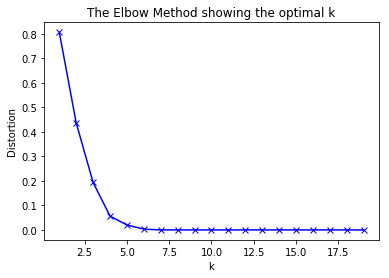

In [16]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [238]:
model = KMeans(n_clusters=8)
model.fit(Final_Df)
Final_output = model.predict(Final_Df)
print(Final_output)

labels, counts = np.unique(Final_output[Final_output>=0], return_counts=True)
print(labels , counts)

Final_Df['Kmeans'] = Final_output
Final_Df.to_csv("KMeansfinaloutput.csv") 


[1 2 2 ... 2 2 1]
[0 1 2 3 4 5 6 7] [1215 3803 2799  171  243   68  155   12]


In [239]:
Final_output = pd.DataFrame(data=Final_output,columns= ["KMeans Cluster"])
final_df = consumer_data.join(Final_output,how='outer')
final_df.head()

,consumer_id,age,gender,City,Country,product_record_id,product_name,brand,product_category,feature_type,...,Technology::Design,Technology::Engineering,Technology::Gadgets,Technology::Hardware,Technology::Internet,Technology::Mobile,Technology::Networking,Technology::Programming,Technology::Software,KMeans Cluster
0,0#RabYbhVVgCzPgZHHUZEaag,39-53,Woman,NaN,NaN,8RaVKmfQj6NN6HBHrH376w,Relipop Women's Sheer Chiffon Blouse Loose Top...,Relipop,Womens::Sweaters::cardigans,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0#mo8VH0Rzn6JVuesA3NRFIA,54-64,Woman,NaN,NaN,JCGOraDWmx5hDvOWKjdO+Q,U.S. Polo Assn. Women's Plus Size Long Self Be...,U.S. Polo Assn.,Womens::Outerwear::Plus Sizes,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0#cAG3ZpdiSWKxAQVv4Oq6Ww,54-64,Woman,NaN,NaN,y/cnfsShS/budsPIHVSJew,Amstt Women Plus Size Sleeveless Casual V neck...,Amstt,Womens::Dresses::Plus Sizes,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,0#/3oOmdZJGGBmbAHYxw8kWw,39-53,Woman,NaN,NaN,XUIItxZ4weHOG+ZbWMH3jg,MBJ Womens Knit Capri Culottes Pants - Made in...,Made by Johnny,Womens::Pants::Capris,attribute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0#inTnIhH2G2OYnEkMgVgkiw,39-53,Woman,NaN,NaN,2bsecZklJSTDf09fp9NWZA,Aceshin Womens Bell Sleeve Tops Cold Shoulder ...,Aceshin,Womens::Tops::Assorted,attribute,...,NaN,NaN,0.041443,NaN,NaN,NaN,NaN,NaN,NaN,1


In [99]:
Final_output["KMeans Cluster"].unique()

array([0, 2, 1, 6, 3, 5, 4, 7], dtype=int64)

In [240]:
final_file = final_df.to_csv('Clusterised Consumer Data.csv')

In [241]:
cluster_based_ratings = final_df.pivot_table(index='KMeans Cluster',columns="product_record_id",values='rating_score')
cluster_based_ratings.head()

product_record_id,++T2VTyTPeScuGK0MykMyg,+/1p93uqUTjjb3WaPdRlHQ,+/BPwd45IAUiRBXZSflZjQ,+/VOBqzkLgLpfObADS7pGw,+/vKGOQDWzFI3MSmE//X3Q,+02e/P9RBgCbcIQoj1YScw,+0n9mHord67rcwviLTsxBw,+0usNgNy5Exb17xrSWXHIQ,+1cTZQtKSWPdiOIWXX+HjQ,+1mnhNK3k8yOm0ZAfhemDQ,...,zqyI+44ecT72ZveiRJleoQ,ztYvzcsrUOsva+tfxaQumw,ztuwDELfUTGwDyp1FZRbdQ,zuk6S/p8E2E+g72ZjbaXug,zvDIFz1stEn9vcEzyonEKQ,zvsGgxagJpuhkB95RWPTcw,zwmYt0iY/ukzDfs6dC4+nA,zxI9vh7ZEIMFi8PuXgRQbA,zyDJAJ9wLvVFix6s/psaWg,zyUjvvCXXw9XwxCaOVgM1g
KMeans Cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,NaN,5.0,4.0,NaN,NaN,5.0,5.0,NaN,2.0,NaN,...,NaN,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,5.0,...,5.0,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [53]:
# for i in range(8):
#     print('Cluster No. {}, not Null values {}'.format(i,cluster_based_ratings.loc[i].notnull().sum()))

In [242]:
corrMatrix = cluster_based_ratings.fillna(0).corr()

In [243]:
# for i in range(len(corrMatrix)):
#     print('Not Null values in Each Row {}'.format(corrMatrix.iloc[i].notnull().sum()))

In [244]:
d = pd.DataFrame()
for i in range(len(cluster_based_ratings.index)):
    temp_ratings = cluster_based_ratings.iloc[i].dropna()
    
    similarity_series = pd.Series()
    for j in range(0,len(temp_ratings.index)):
        sims = corrMatrix[temp_ratings.index[j]].dropna()
        sims = sims.map(lambda x : x* temp_ratings[j])
        sims_df= similarity_series.append(sims)
    d[i]  = sims_df
d.head(20)


,0,1,2,3,4,5,6,7
++T2VTyTPeScuGK0MykMyg,-0.714286,-0.428571,-0.714286,-0.714286,5.000000,-0.428571,-0.714286,-0.714286
+/1p93uqUTjjb3WaPdRlHQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+/BPwd45IAUiRBXZSflZjQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+/VOBqzkLgLpfObADS7pGw,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+/vKGOQDWzFI3MSmE//X3Q,-0.714286,-0.428571,-0.714286,-0.714286,-0.714286,3.000000,-0.714286,-0.714286
+02e/P9RBgCbcIQoj1YScw,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+0n9mHord67rcwviLTsxBw,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+0usNgNy5Exb17xrSWXHIQ,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+1cTZQtKSWPdiOIWXX+HjQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286
+1mnhNK3k8yOm0ZAfhemDQ,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286


In [195]:
d.to_csv("Cluster Based Ratings.csv")

In [245]:
combined_data.columns

Index(['consumer_id', 'age', 'gender', 'interest', 'product_record_id',
       'product_name', 'brand', 'product_category', 'feature_type', 'level_1',
       'level_2', 'level_3', 'rating_scale', 'rating_score'],
      dtype='object')

In [246]:
products = pd.DataFrame(combined_data[["product_record_id","product_name","brand","product_category","feature_type","level_1",
                                     "level_2","level_3",'gender']])
products.head()

,product_record_id,product_name,brand,product_category,feature_type,level_1,level_2,level_3,gender
0,8RaVKmfQj6NN6HBHrH376w,Relipop Women's Sheer Chiffon Blouse Loose Top...,Relipop,Womens::Sweaters::cardigans,attribute,Design Details,Adornment,Lace Category,Woman
1,0Lv+O/XYe9f2gWFvLAPlFA,Kearia Women Sexy Off The Shoulder Ruffled V N...,Kearia,Womens::Dresses::Assorted,attribute,Retail-related,Experience,Computer Monitor Display Category,Woman
2,JCGOraDWmx5hDvOWKjdO+Q,U.S. Polo Assn. Women's Plus Size Long Self Be...,U.S. Polo Assn.,Womens::Outerwear::Plus Sizes,attribute,Outfit Pieces,Outerwear,Coat Category,Woman
3,y/cnfsShS/budsPIHVSJew,Amstt Women Plus Size Sleeveless Casual V neck...,Amstt,Womens::Dresses::Plus Sizes,attribute,Styling,Activewear,Champion Category,Woman
4,1V2ComQk4vS1lauTHYP0Ig,"Plus Size Printed Swing Top, Created for Macy's",Alfani,Womens::Tops::Plus Sizes,attribute,Garment Fit,Revealing Fit,Coverage Category,Woman


In [247]:
products["product_record_id"].nunique()

9402

In [248]:
def merged_df(df):
    df= df.reset_index()
    df.columns = ['product_record_id',1,2,3,4,5,6,7,8]
    new_df = df.merge(products,on="product_record_id")
    new_df = new_df.set_index('product_record_id')
    return new_df

In [249]:
final_df = merged_df(d)
final_df.head(5)

,1,2,3,4,5,6,7,8,product_name,brand,product_category,feature_type,level_1,level_2,level_3,gender
product_record_id,,,,,,,,,,,,,,,,
++T2VTyTPeScuGK0MykMyg,-0.714286,-0.428571,-0.714286,-0.714286,5.000000,-0.428571,-0.714286,-0.714286,U.S. Polo Assn. Men's Solid Polo Shirt,U.S. Polo Assn.,Men::Tops::Polos,attribute,Construction,Sleeves,NaN,Man
+/1p93uqUTjjb3WaPdRlHQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Diamond keep it Liquid Wet Look Shiny Metallic...,Diamond keep it,Womens::Pants::Leggings,attribute,Outfit Pieces,Pant Category,Denim Legging Category,Woman
+/BPwd45IAUiRBXZSflZjQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Lalagen Women's Floral Lace Long Sleeve Off Sh...,Lalagen,Womens::Dresses::Assorted,attribute,Styling,Evening Wear,Brides Category,Woman
+/VOBqzkLgLpfObADS7pGw,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,SYROKAN Women's Front Adjustable Lightly Padde...,SYROKAN,Womens::Tops::Activewear,attribute,Garment Fit,Revealing Fit,Coverage Category,Woman
+/vKGOQDWzFI3MSmE//X3Q,-0.714286,-0.428571,-0.714286,-0.714286,-0.714286,3.000000,-0.714286,-0.714286,Izod Mens Twill Slit Pocket Bermuda Shorts,IZOD,Men::Bottoms::Shorts,attribute,Fabrics & Fibers,Premium,NaN,Man


In [250]:
final_df.shape

(8581, 16)

In [251]:
final_df.shape

(8581, 16)

In [252]:
final_df.to_csv("Consumer Ratings and Product Information.csv")

In [253]:
final_df

,1,2,3,4,5,6,7,8,product_name,brand,product_category,feature_type,level_1,level_2,level_3,gender
product_record_id,,,,,,,,,,,,,,,,
++T2VTyTPeScuGK0MykMyg,-0.714286,-0.428571,-0.714286,-0.714286,5.000000,-0.428571,-0.714286,-0.714286,U.S. Polo Assn. Men's Solid Polo Shirt,U.S. Polo Assn.,Men::Tops::Polos,attribute,Construction,Sleeves,NaN,Man
+/1p93uqUTjjb3WaPdRlHQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Diamond keep it Liquid Wet Look Shiny Metallic...,Diamond keep it,Womens::Pants::Leggings,attribute,Outfit Pieces,Pant Category,Denim Legging Category,Woman
+/BPwd45IAUiRBXZSflZjQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Lalagen Women's Floral Lace Long Sleeve Off Sh...,Lalagen,Womens::Dresses::Assorted,attribute,Styling,Evening Wear,Brides Category,Woman
+/VOBqzkLgLpfObADS7pGw,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,SYROKAN Women's Front Adjustable Lightly Padde...,SYROKAN,Womens::Tops::Activewear,attribute,Garment Fit,Revealing Fit,Coverage Category,Woman
+/vKGOQDWzFI3MSmE//X3Q,-0.714286,-0.428571,-0.714286,-0.714286,-0.714286,3.000000,-0.714286,-0.714286,Izod Mens Twill Slit Pocket Bermuda Shorts,IZOD,Men::Bottoms::Shorts,attribute,Fabrics & Fibers,Premium,NaN,Man
+02e/P9RBgCbcIQoj1YScw,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Mid Rise Moto True Skinny Jeans in Sculpt,Gap,Womens::Pants::Jeans::Assorted,attribute,Fabric & Material,Synthetics,Elastane Category,Woman
+0n9mHord67rcwviLTsxBw,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Legendary Whitetails Ladies Outfitter Hoodie,Legendary Whitetails,Womens::Sweaters::Hoodies,attribute,Product Care,Wash Category,NaN,Woman
+0usNgNy5Exb17xrSWXHIQ,-0.714286,-0.428571,5.000000,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,"Laksmi Elegant Dresses, Womens Casual Dress A ...",Laksmi,Womens::Dresses::Assorted,attribute,Colors,Tan Color Category,NaN,Woman
+1cTZQtKSWPdiOIWXX+HjQ,-0.714286,3.000000,-0.714286,-0.714286,-0.714286,-0.428571,-0.714286,-0.714286,Lyssé Women's Mindy Zip Crop,Lysse,Womens::Pants::Assorted,attribute,Design Details,Stitching & Seams,Seam Category,Woman


In [254]:
df_without_duplicates = final_df[~final_df.index.duplicated(keep='first')]

In [255]:
df_without_duplicates.shape

(7993, 16)

In [256]:
df_without_duplicates.to_csv("Clusteres Based on Attributes feature.csv")

In [258]:
my_stop_words = text.ENGLISH_STOP_WORDS.union((["'s",'&','category',',','Product','Wash','Care','fashion','Category','product',
                                                'wash','care','fashion'
                                                "0","1","2","3","4","5","6","7","8","9",'``',]+ 
                                               list(x.lower() for x in df_without_duplicates['brand'])
                                              + [i for i in string.punctuation]))

In [262]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [264]:
df_without_duplicates["product_category_1"] = df_without_duplicates.loc[:,"product_category"].str.split("::").str.get(1)

df_without_duplicates["All"] = (df_without_duplicates["product_name"] + " " +
                                df_without_duplicates["product_category_1"] + " " +
                                df_without_duplicates["gender"] + " " +
                                df_without_duplicates["level_1"] + " " +
                                df_without_duplicates["level_2"] + " " +
                                df_without_duplicates["level_3"].fillna(""))
df_without_duplicates['Tags'] = df_without_duplicates["All"].str.lower().fillna("").apply(LemmaTokenizer()).apply(lambda x: [item for item in x if item not in my_stop_words])
df_without_duplicates.drop(columns=["All","product_category_1"],inplace=True)

In [268]:
for i in df_without_duplicates["Tags"]:
    print(i)

['u.s.', 'polo', 'assn', 'men', 'solid', 'polo', 'shirt', 'man', 'construction', 'sleeve']
['diamond', 'liquid', 'wet', 'look', 'shiny', 'metallic', 'stretch', 'legging', 'pant', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['woman', 'floral', 'lace', 'long', 'sleeve', 'shoulder', 'wedding', 'mermaid', 'dress', 'dress', 'woman', 'styling', 'evening', 'wear', 'bride']
['woman', 'adjustable', 'lightly', 'padded', 'racerback', 'high', 'impact', 'sport', 'bra', 'woman', 'garment', 'fit', 'revealing', 'fit', 'coverage']
['men', 'twill', 'slit', 'pocket', 'bermuda', 'short', 'man', 'fabric', 'fiber', 'premium']
['mid', 'rise', 'moto', 'true', 'skinny', 'jean', 'sculpt', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'elastane']
['legendary', 'whitetail', 'lady', 'outfitter', 'hoodie', 'sweater', 'woman']
['elegant', 'dress', 'woman', 'casual', 'dress', 'line', 'cap', 'sleeve', 'v', 'neck', 'dress', 'woman', 'color', 'tan', 'color']
['lyssé', 'woman', 'mindy', 'zip', 'crop', '

['petite', '3/4-sleeve', 'sweatshirt', 'created', 'macy', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'sweatshirt']
['woman', 'tunic', 'loose', 'fit', 'long', 'tunic', 'usa', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['pearl', 'oversize', 'hoodie', 'sweater', 'woman', 'dryer', 'machine']
['lock', 'love', 'll', 'woman', 'round', 'neck', 'long', 'sleeve', 'ombre', 'tunic', 'slit', 'usa', 'woman', 'color', 'tan', 'color']
['jamie', 'high', 'waist', 'ankle', 'grazer', 'skinny', 'jean', 'pant', 'woman', 'design', 'closure', 'zipper']
['viv', 'collection', 'length', 'woman', 'solid', 'color', 'brushed', 'legging', 'x', '2xl', 'pant', 'woman', 'color', 'tan', 'color']
['90', 'degree', 'reflex', 'high', 'waist', 'power', 'flex', 'legging', '–', 'tummy', 'control', 'pant', 'woman']
['woman', 'patchwork', 'bohemia', 'sleeve', 'tunic', 'casual', 'basic', 'shirt', 'woman', 'outfit', 'piece', 'pant', 'jean']
['twist', 'hem', 'tee', 'woman']
['woman', 'solid', 'comfy', 'loose'

['emma', 'woman', 'solid', 'tie', 'dye', 'crew', 'neck', 'spaghetti', 'strap', 'body-con', 'midi', 'dress', 'dress', 'woman', 'retail-related', 'shipment', 'shipping', 'estimate']
['dicky', 'men', 'relaxed', 'fit', 'straight-leg', 'duck', 'carpenter', 'jean', 'man', 'construction', 'closure', 'zipper']
['woman', 'basic', 'long', 'sleeve', 'soft', 'turtle', 'neck', 'sweater', 'sweater', 'woman', 'fabric', 'material', 'fabric']
['shelf-bra', 'camisole', 'created', 'macy', 'woman', 'outfit', 'piece', 'undergarment', 'camisole']
['woman', 'long', 'cardigan', 'yellow', 'color', 'block', 'open', 'long', 'sleeve', 'kint', 'cardigan', 'sweater', 'sweater', 'woman', 'retail-related', 'sizing', 'measurement']
['viv', 'collection', 'updated', 'best', 'selling', 'printed', 'brushed', 'buttery', 'soft', 'legging', 'regular', 'plus', '40+', 'design', 'list', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['calvin', 'klein', 'woman', 'printed', 'woven', 'short', 'short', 'woman', 'd

['woman', 'velvet', 'bodycon', 'cocktail', 'club', 'party', 'dress', 'long', 'sleeve', 'dress', 'woman', 'design', 'closure', 'zipper']
['woman', 'plus', 'size', 'booty', 'short', 'cotton', 'comfortable', 'stretch', 'yoga', 'short', 'short', 'woman', 'outfit', 'piece', 'dress']
['woman', '1920s', 'black', 'sequin', 'gatsby', 'maxi', 'long', 'evening', 'prom', 'dress', 'dress', 'woman', 'design', 'closure', 'placket', 'closure']
['woman', 'shoulder', 'batwing', 'sleeve', 'loose', 'pullover', 'sweater', 'long', 'sleeve', 'knit', 'jumper', 'sweater', 'woman', 'fabric', 'material', 'fabric']
['woman', 'vintage', '1950', 'floral', 'spring', 'garden', 'rockabilly', 'swing', 'prom', 'party', 'cocktail', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'picture']
['nissan', 'altima', 'official', 'test', 'driver', 'funny', 't', 'shirt', 'man', 'fabric', 'fiber', 'cotton']
['woman', 'fall', 'long', 'sleeve', 'split', 'loose', 'casual', 'pullover', 'tunic', 'woman', 'outfit', 'piece', '

['woman', 'long', 'sleeve', 'floral', 'pocket', 'casual', 'swing', 'pleated', 't-shirt', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'picture']
['signature', 'levi', 'strauss', 'co.', 'gold', 'label', 'woman', 'modern', 'skinny', 'jean', 'pant', 'woman', 'outfit', 'piece', 'pant', 'jean']
['bella', 'lady', 'flowy', 'racerback', 'tank', 'woman', 'design', 'neckline', 'scoop', 'neck']
['good', 'leg', 'crop', 'skinny', 'jean', 'pant', 'woman', 'fabric', 'material', 'fabric']
['90', 'degree', 'reflex', 'woman', 'power', 'flex', 'yoga', 'pant', 'magenta', 'haze', 'pant', 'woman', 'styling', 'activewear', 'exercise']
['woman', 'vintage', '1950s', 'style', '3/4', 'sleeve', 'black', 'lace', 'flare', 'a-line', 'dress', 'dress', 'woman', 'garment', 'fit', 'breast']
['woman', 'black', 'cocktail', 'long', 'sleeve', 'mesh', 'a-line', 'skater', 'short', 'dress', 'casual', 'dress', 'woman', 'design', 'closure', 'zipper']
['woman', 'long', 'sleeve', 'casual', 'loose', 't-shirt', 'dress'

['woman', 'casual', 'stretchy', 'straight', 'leg', 'high', 'waisted', 'long', 'pant', 'belt', 'pant', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'deep', 'v', 'neck', 'adjustable', 'spaghetti', 'strap', 'summer', 'dress', 'sleeveless', 'sexy', 'backless', 'party', 'dress', 'pocket', 'dress', 'woman', 'outfit', 'piece', 'jewelry', 'jewel']
['woman', 'letter', 'print', 'short', 'sleeve', 'crew', 'neck', 'casual', 'cotton', 't-shirt', 'tee', 'blouse', 'woman', 'garment', 'fit', 'revealing', 'fit']
['junior', 'pastel', 'mickey', 'jr', 't-shirt', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'jacket', 'lady', 'winter', 'hooded', 'sweater', 'coat', 'zipper', 'warm', 'wool', 'coat', 'outwear', 'plus', 'size', 'outerwear', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['cotton', 'embroidered', 'printed', 't-shirt', 'created', 'macy', 'woman', 'styling', 'retro', 'vintage', 'style']
['moda', 'extra', 'soft', 'legging', 'desi

['sporty', 'tee', 'woman', 'dryer', 'machine']
['men', 'windproof', 'thermal', 'softshell', 'cycling', 'winter', 'jacket', 'outerwear', 'man', 'outfit', 'piece', 'sweater', 'pullover']
['legging', 'depot', 'buttery', 'soft', 'basic', 'solid', '45', 'color', 'best', 'seller', 'legging', 'pant', 'carry', '1000+', 'print', 'design', 'pant', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['cotton', 'lace-up', 'thermal', 'woman', 'design', 'adornment', 'lace']
['i.n.c', 'jacquard', 'dot', 'slim', 'pant', 'created', 'macy', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'deep', 'v', 'neck', 'short', 'sleeve', 'unique', 'cross', 'wrap', 'casual', 'flared', 'midi', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['legging', 'mania', 'regular/plus', 'xs-5xl', 'solid', 'ultra', 'soft', 'high', 'waist', 'legging', 'pant', 'woman', 'retail-related', 'sizing', 'measurement']
['woman', 'polka', 'dot', 'retro', 'vintage'

['unisex', 'kpop', 'bts', 'bangtan', 'boy', 'hoodie', 'sweatshirt', 'athleisure', 'sweater', 'woman', 'design', 'closure', 'placket', 'closure']
['woman', 'knee', 'skinny', 'denim', 'distressed', 'ripped', 'boyfriend', 'jean', 'pant', 'woman', 'design', 'closure', 'zipper']
['woman', 'sexy', 'hooded', 'dress', 'autumn', 'long', 'sleeve', 'tight', 'short', 'mini', 'bodycon', 'dress', 'dress', 'woman', 'outfit', 'piece', 'label']
['woman', 'plus', 'size', 'classic', '3/4', 'sleeve', 'open', 'cropped', 'cardigan', '16w-24w', 'sweater', 'woman', 'fabric', 'material', 'synthetic', 'elastane']
['woman', 'casual', 'wide', 'leg', 'slit', 'loose', 'palazzo', 'yoga', 'fitness', 'sport', 'pant', 'trouser', 'pant', 'woman', 'retail-related', 'shipment', 'expedited', 'shipping']
['woman', 'sherpa', 'lined', 'sandstone', 'sierra', 'jacket', 'wj141', 'outerwear', 'woman', 'garment', 'fit', 'revealing', 'fit', 'coverage']
['satina', 'yoga', 'pant', 'capri', 'activewear', 'exercise', 'legging', 'w/desi

['woman', 'high-low', 'hem', 'pullover', 'blouse', 'woman', 'retail-related', 'experience', 'picture']
['woman', 'sexy', 'shoulder', 'crop', '10', 'color', 'summer', 'long', 'sleeve', 'casual', 'slim', 'tee', 'woman', 'color', 'tan', 'color']
['conail', 'coco', 'woman', 'tulle', 'beading', 'a-line', 'bridesmaid', 'prom', 'dress', 'long', 'cocktail', 'evening', 'gown', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'long', 'sleeve', 'turtleneck', 'cross', 'loose', 'fit', 'casual', 'tunic', 'woman', 'outfit', 'piece', 'pant', 'jean']
['woman', 'mesh', 'slim', 'sleeveless', 'short', 'mini', 'flare', 'dress', 'dress', 'woman', 'fabric', 'material', 'fabric']
['woman', 'classic', 'open', 'lightweight', 'soft', 'drape', 'cardigan', 's-3x', 'sweater', 'woman', 'color', 'tan', 'color']
['woman', 'blouse', 'buffalo', 'check', 'plaid', 'long', 'sleeve', 'collar', 'neck', 'casual', 'button', 'shirt', 'woman', 'retail-related', 'experience', 'cite']
['

['woman', 'cotton', 'v', 'neck', 'solid', 'color', 'batwing', 'sleeve', 'casual', 'tshirt', 'woman', 'fabric', 'material', 'material']
['woman', 'hooded', 'packable', 'ultra', 'light', 'weight', 'mid-length', 'jacket', 'outerwear', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'curvy', 'strappy', 'sport', 'bra', 'woman', 'garment', 'fit', 'hip', 'pelvis', 'band']
['octopus', 'printing', 'yoga', 'pant', 'woman', 'high', 'elasticity', 'fitness', 'clothes', 'pant', 'woman', 'design', 'closure', 'placket', 'closure']
['jc', 'distro', 'woman', 'basic', 'jersey', 'racer-back', 'tank', 'scallop', 'woman', 'retail-related', 'distributer']
['woman', 'long', 'sleeve', 'open', 'long', 'maxi', 'cardigan', 'longline', 'duster', 'coat', 'sweater', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'vintage', '1950s', 'party', 'cocktail', 'wedding', 'swing', 'midi', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'cite']
['regna', 'x', 

['plus', 'size', 'side-slit', 't-shirt', 'woman', 'design', 'stitching', 'seam', 'thigh', 'seam']
['woman', 'long', 'sleeve', 'flare', 'tunic', 'woman', 'outfit', 'piece', 'pant', 'jean']
['woman', 'summer', 'print', 'high', 'waist', 'fold', 'chiffon', 'maxi', 'long', 'skirt', 'skirt', 'woman', 'outfit', 'piece', 'skirt']
['party', 'lady', 'woman', 'casual', 'long', 'sleeve', 'ruffled', 'floral', 'printed', 'blouse', 'shirt', 'woman', 'design', 'sleeve', 'sleeve', 'style']
['polo', 'ralph', 'lauren', 'woman', 'perfect', 'v', 'neck', 't-shirt', 'woman', 'garment', 'fit', 'revealing', 'fit']
['lqo00017', 'woman', 'summit', 'lady', 'zip', 'microfleece', 'vest', 'outerwear', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'ruffle', 'flare', 'bell', 'high', 'waist', 'crop', 'pant', 'pant', 'woman', 'outfit', 'piece', 'pant']
['woman', 'figure', 'no-bounce', 'camisole', 'wirefree', 'sport', 'bra', '1066', 'woman']
['woman', 'casual', 'loose', 'hollowed', 'shoulder', 'quarter

['ruby', 'rd', 'woman', 'pull-on', 'solar', 'millennium', 'super', 'stretch', 'pant', 'pant', 'woman', 'garment', 'fit', 'torso-related', 'belly']
['lilly', 'pulitzer', 'woman', 'marlowe', 'dress', 'dress', 'woman', 'outfit', 'piece', 'dress', 'sleeve', 'dress']
['mid', 'rise', 'favorite', 'ankle', 'jeggings', 'destruction', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'elegant', 'deep', 'v', 'neck', 'floral', 'lace', 'high', 'low', 'swing', 'hem', 'cocktail', 'bodycon', 'dress', 'white', 'usl', 'labelxl', 'dress', 'woman', 'styling', 'fashion-forward']
['woman', 'summer', 'halter', 'cross', 'hollow', 'boho', 'bandage', 'tank', 'camis', 'crop', 'vest', 'outerwear', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'strap', 'rose', 'skull', 'check', 'spicy', 'boom', 'print', 'swing', 'dress', 'dress', 'woman', 'fabric', 'material', 'synthetic', 'elastane']
['men', 'saltwater', 'slim-fit', 'stretch', 'pant', 'man', 'body', '

['woman', 'deep', 'v-neck', 'empire', 'waist', 'ruched', 'slimming', 't-shirt', 'blouse', 's-xxl', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['levi', 'woman', 'classic', 'capri', 'pant', 'woman', 'laundry', 'detergent']
['mario', 'serrani', 'woman', 'blue', 'geometric', 'shift', 'dress', 'fitted', 'dress', 'woman', 'fabric', 'material', 'performance', 'material', 'stretch', 'fabric']
['plus', 'size', 'mixed-print', 'lace-up', 'created', 'macy', 'woman', 'design', 'placket', 'contrast']
['woman', 'junior', 'basic', 'stretchy', 'fit', 'skinny', 'jean', 'pant', 'woman', 'garment', 'fit', 'leg', 'fit', 'inseam', 'section']
['legging', 'depot', 'yoga', 'waist', 'reg/plus', 'woman', 'buttery', 'soft', 'workout', 'gym', 'legging', 'pant', 'woman', 'fabric', 'material', 'material']
['cotton', 'high-low', 'created', 'macy', 'woman', 'design', 'stitching', 'seam', 'seam']
['100', 'irish', 'merino', 'wool', 'lady', 'hooded', 'zip', 'sweater', 'coat', 'west', 'end',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['woman', 'plaid', 'print', 'long', 'sleeve', 'elbow', 'patch', 'draped', 'open', 'cardigan', 'sweater', 'sweater', 'woman', 'design', 'open']
['18600fl', 'heavy', 'blend', 'missy', 'fit', 'full-zip', 'hooded', 'sweatshirt', 'sweater', 'woman', 'outfit', 'piece', 'accessory', 'handbag']
['woman', 'roaring', '20', 'vintage', 'art', 'deco', 'sequin', 'tea', 'flapper', 'dress', 'l', 'black', 'dress', 'woman', 'design', 'pattern']
['woman', 'elegant', 'dress', 'work', 'office', 'lined', 'tea', 'midi', 'dress', 'dress', 'woman', 'fabric', 'material', 'fabric']
["'polly", 'cold', 'shoulder', 'shift', 'dress', 'dress', 'woman', 'outfit', 'piece', 'dress']
['woman', 'essential', 'bermuda', 'short', 'short', 'woman', 'color', 'tan', 'color']
['kickin', 'french', 'terry', 'lounge', 'pant', 'pant', 'woman', 'design', 'stitching', 'seam', 'hem', 'rise']
['woman', 'sexy', 'lady', 'sleeveless', 'a-line', 'beach', 'asymmetrical', 'hem', 'lace', 'crochet', 'dress', 'dress', 'woman', 'outfit', 'piece'

['woman', 'funnel', 'neck', 'hooded', 'pullover', 'hoodie', 'tunic', 'sweatshirt', 'pocket', 'sweater', 'woman', 'garment', 'fit', 'revealing', 'fit']
['woman', 'floral', 'vintage', 'patchwork', 'pocket', 'puffy', 'swing', 'casual', 'party', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'small', 'arcanum', 'sword', 'tarot', 'tank', 'sleeveless', 'curve', 'shirt', 'woman', 'styling', 'fashion-forward']
['woman', 'vintage', '1950s', 'retro', 'rockabilly', 'prom', 'dress', 'cap-sleeve', 'dress', 'woman', 'outfit', 'piece', 'dress']
['woman', 'double', 'breasted', 'faux-leather', 'trim', 'fleece', 'jacket', 'outerwear', 'woman', 'outfit', 'piece', 'accessory', 'belt']
['leatherette', 'short', 'skirt', 'woman', 'winter', 'high', 'waist', 'flare', 'skirt', 'black', 'x-large', 'skirt', 'woman', 'fabric', 'material', 'fabric']
['queenie', 'ke', 'woman', 'power', 'flex', 'yoga', 'pant', 'workout', 'running', 'legging', 'color', 'pant', 'wo

['workout', 'clothes', 'racerback', 'yoga', 'clothes', 'sexy', 'strappy', 'sport', 'bra', 'woman', 'woman', 'fabric', 'material', 'performance', 'material', 'wicking']
['woman', 'power', 'flex', 'yoga', 'pant', 'workout', 'running', 'legging', 'color', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', '’', 's', '3/4', 'sleeve', 'casual', 'swing', 't-shirt', 'dress', 'dress', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'knit', 'turtleneck', 'sweater']
['y-back', 'maximum', 'support', 'sport', 'bra', 'removable', 'light', 'pad', 'woman', 'fabric', 'material', 'fabric']
['woman', 'line', 'striped', 'sleeveless', 'tank', 'racerback', 'long', 'dress', 'dress', 'woman', 'fabric', 'material', 'lining']
['woman', 'thickened', 'jacket', 'wished', 'gift', 'idea', 'outerwear', 'woman', 'fabric', 'material', 'fabric']
['woman', 'lightweight', 'sleeveless', 'military', 'stretchy', 'drawstring', 'jacket', 'vest', 'zipper', 'outerwear', 'woman', 'design', 'closure', 'b

['petite', 'croft', 'barrow', 'pull-on', 'knit', 'pant', 'pant', 'woman', 'garment', 'fit', 'hip', 'pelvis']
['woman', 'kearns', 'insulated', 'jacket', 'outerwear', 'woman', 'garment', 'fit']
['flex', 'stretch', 'bootcut', 'yoga', 'pant', 'created', 'macy', 'pant', 'woman', 'outfit', 'piece', 'undergarment', 'brassiere']
['henny', 'rue', 'woman', 'comfort', 'sport', 'bra', 'low', 'support', 'workout', 'yoga', 'bra', 'pack', 's', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'plus', 'size', 'sleeve', 'tunic', 'loose', 'floral', 'print', 'shirt', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'winter', 'padded', 'vest', 'removable', 'hooded', 'outwear', 'jacket', 'outerwear', 'woman', 'outfit', 'piece', 'accessory', 'bag']
['camari', 'choker', 'collar', 'sheath', 'dress', 'dress', 'woman', 'design', 'closure', 'loop', 'velcro']
['woman', '1920s', 'dress', 'vintage', 'beaded', 'fringed', 'inspired', 'flapper', 'dress', 'dress', 'woman', 'garment', 'fit

['woman', 'elegant', 'spaghetti', 'strap', 'deep', 'v', 'neck', 'sleeveless', 'bodycon', 'party', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['men', 'frost-fighter', 'puffer', 'jacket', 'outerwear', 'man', 'fabric', 'fiber', 'synthetic', 'fiber', 'polyester']
['subtle', 'flavor', 'woman', 'mermaid', 'skirt', 'high', 'waist', 'fishtail', 'hem', 'solid', 'bodycon', 'pencil', 'midi', 'skirt', 'skirt', 'woman', 'dryer', 'machine']
['floral', 'bell-sleeve', 'tiered', 'dress', 'dress', 'woman', 'garment', 'fit', 'leg', 'fit', 'knee']
['woman', 'comfy', 'v-neck', 'tunic', 'usa', 'woman', 'design', 'pattern']
['racerback', 'tank', 'woman', 'moisture', 'wicking', 'workout', 'shirt', 'size', 'xs-4xl', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'dino', 'lovely', 'pink', 'sleeveless', 'dress', 'dino', 'lovely', 'pink', 'l', 'dress', 'woman', 'fabric', 'material', 'fabric']
['woman', 'underwire', 'sport', 'bra', 'woman', 'desi

['woman', 'gia', 'legging', 'pant', 'woman', 'handwash', 'cycle']
['woman', 'sexy', 'long', 'batwing', 'sleeve', 'loose', 'pullover', 'casual', 'blouse', 't-shirt', 'woman', 'color', 'neon', 'orange']
['woman', 'high', 'waist', 'casual', 'floral', 'print', 'drawstring', 'wide', 'leg', 'pant', 'pant', 'woman', 'design', 'closure', 'blouse']
['yoga', 'pant', 'woman', 'power', 'flex', 'yoga', 'pant', 'tummy', 'control', 'workout', 'yoga', 'capri', 'pant', 'legging', 'pant', 'woman', 'garment', 'fit', 'general', 'fit-related', 'chafing']
['regna', 'x', 'boho', 'woman', 'sleeveless', 'solid', 'flower', 'pattern', 'maxi', 'midi', 'party', 'casual', 'sexy', 'dress', 'style', 'plus', 'size', 'dress', 'woman', 'garment', 'fit', 'hip', 'pelvis', 'band']

['woman', 'fall', 'long', 'sleeve', 'split', 'loose', 'casual', 'pullover', 'tunic', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'pullover']
['woman', 'midrise', 'cinch-bottom', 'fleece', 'sweatpant', 'pant', 'woman', 'fabric', 'materia

['woman', 'tamiami', 'ii', 'long-sleeve', 'shirt', 'woman', 'design', 'closure', 'button']
['legging', 'depot', 'ultra', 'soft', 'woman', 'best', 'printed', 'regular', 'plus', 'size', 'legging', 'pant', 'woman', 'color', 'tan', 'color']
['woman', '3/4', 'sleeve', 'loose', 'plain', 'casual', 'maxi', 'dress', 'pocket', 'dress', 'woman', 'garment', 'fit', 'leg', 'fit', 'ankle']
['doris', 'woman', 'long', 'sleeve', 'solid', 'charade', 'boyfriend', 'shirt', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'picture']
['woman', 'tailored', 'long', 'sleeve', 'button', 'shirt', 'stretch', 'woman', 'design', 'sillouettes', 'blouson', 'waist']
['woman', 'black', 'hooded', 'neck', 'letter', 'print', 'cat', 'ear', 'pocket', 'hoodie', 'sweater', 'woman', 'fabric', 'material', 'fabric']
['plus', 'size', 'slimming', 'high-waisted', 'legging', 'pant', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['tapered', 'stretch', 'wool', 'ankle', 'pant', 'pant', 'woman', 'design', 'stitching',

['plaid', 'plain', 'woman', 'linen', 'summer', 'loose', 'midi', 'length', 'shift', 'dress', 'pocket', 'dress', 'woman', 'styling', 'casual', 'apparel']
['woman', 'basic', 'spaghetti', 'strap', 'cami', 'tank', 'tunic', 'dress', 'dress', 'woman', 'color', 'tan', 'color']
['woman', 'solid', 'flared', 'modal', 'maxi', 'skirt', 'skirt', 'woman', 'fabric', 'material', 'fabric']
['junior', 'flx', 'stretch', 'ripped', 'bootcut', 'jean', 'pant', 'woman']
['woman', 'summer', 'contrast', 'sleeveless', 'tank', 'floral', 'print', 'maxi', 'dress', 'dress', 'woman', 'outfit', 'piece', 'dress']
['woman', '3/4', 'sleeve', 'casual', 'cotton', 'flare', 'dress', 'dress', 'woman', 'dryer', 'machine']
['levi', 'woman', 'petite', '524', 'skinny', 'jean', 'pant', 'woman', 'design', 'adornment', 'hardware']
['woman', 'asymmetrical', 'hem', 'high', 'low', 'boho', 'solid', 'summer', 'beach', 'skirt', 'dress', 'dress', 'woman', 'dryer', 'machine']
['society', 'new', 'york', 'woman', 'extended', 'cap', 'sleeve', '

['retro', '1950s', 'cocktail', 'dress', 'vintage', 'swing', 'dress', 'cap-sleeves', 'dress', 'woman', 'styling', 'evening', 'wear', 'bride']
['bebop', 'woman', 'pocket', 'bootcut', 'stretch', 'cotton', 'twill', 'chino', 'pant', 'pant', 'woman', 'garment', 'fit', 'leg', 'fit', 'knee']
['lucky', 'brand', 'woman', 'sofia', 'straight', 'leg', 'jean', 'pant', 'woman', 'dryer', 'machine']
['lock', 'love', 'll', 'woman', 'long', 'sleeve', 'asymmetrical', 'hem', 'trapeze', 'tunic', 'usa', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['ea', 'selection', 'woman', 'plaid', 'hem', 'funnel', 'neck', 'pullover', 'hoodie', 'sweater', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['company', 'woman', 'crochet', 'lace', 'short', 'usa', 'short', 'woman', 'design', 'pattern']
['floral-print', 'straight', 'fit', 'dress', 'regular', 'petite', 'size', 'dress', 'woman', 'outfit', 'piece', 'dress']
['woman', 'long', 'sleeve', 'striped', 'button', 'cowl', 'neck', 'tunic', 'sweatshirt', 'sw

['woman', 'sleeveless', 'tunic', 'reg', 'plus', 'size', 'tunic', 'woman', 'usa', 'woman', 'design', 'neckline', 'scoop', 'neck']
['allegra', 'k', 'woman', 'contrast', 'color', 'half', 'length', 'sleeve', 'stripe', 'shirt', 'woman', 'garment', 'fit', 'hip', 'pelvis']
['men', 'plaid', 'design', 'dress', 'vest', 'necktie', 'black', 'gray', 'white', 'neck', 'tie', 'set', 'outerwear', 'man', 'outfit', 'piece', 'formal', 'attire', 'tuxedo']
['woman', 'fur', 'frenzy', 'sweater', 'turtleneck', 'zip', 'pullover', 'jacket', 'outerwear', 'woman', 'styling', 'fashion-forward']
['woman', 'bell', 'dark', 'denim', 'plus', 'size', 'jean', 'distressed', 'sand', 'washed', 'pant', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 'long', 'sleeve', 'draped', 'open', 'cardigan', 'sweater', 'woman', 'design', 'open']
['unique', 'style', 'seamless', 'long', 'tank', 'stretch', 'camisole', 'layering', 'regular', 'plus', 'size', 'pack', 'woman', 'retail-related', 'sizing', 'mea

['leather', 'moto', 'jacket', 'regular', 'petite', 'size', 'pant', 'woman', 'outfit', 'piece', 'outerwear', 'parka']
['woman', 'mesh', 'panel', 'stretchy', 'running', 'legging', 'gym', 'workout', 'fitness', 'yoga', 'pant', 'pant', 'woman', 'styling', 'fashion-forward']
['woman', 'super', 'soft', 'function', 'seamless', 'workout', 'gym', 'run', 'yoga', 'sport', 'long', 'sleeve', 'athletic', 't-shirt', 'woman', 'garment', 'fit', 'physique', 'weight']
['scoop', 'neck', 'tank', 'woman']
['woman', 'crewneck', 'long', 'sleeve', 'shirt', 'cotton', 'basic', 't', 'shirt', 'breathable', 'blouse', 'woman', 'garment', 'fit', 'breast']
['jag', 'jean', 'woman', 'paley', 'boot', 'pull', 'jean', 'pant', 'woman', 'design', 'stitching', 'seam', 'hem', 'rise']
['tickled', 'teal', 'woman', 'moto', 'jegging', 'gray', 'xl', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['u.s.', 'polo', 'assn', 'men', 'pocket', 'slim', 'straight', 'stretch', 'bedford', 'corduroy', 'pant', 'man', 'outfit', 'p

['just', 'size', 'woman', 'plus', 'cotton', 'jersey', 'pull-on', 'short', 'short', 'woman', 'fabric', 'material', 'cotton', 'combed', 'cotton']
['waylon', 'shoulder', 'blouson', 'dress', 'dress', 'woman', 'design']
['woman', 'tartan', 'workout', 'capri', 'legging', 'fitted', 'stretch', 'tights', 'pant', 'woman', 'garment', 'fit', 'leg', 'fit']
['men', 'premium', 'no-iron', 'expandable-waist', 'plain-front', 'pant', 'man', 'construction', 'fold', 'pocket', 'pocket']
['stretchy', 'fitted', 'tulip', 'hem', 'tank', 'dress', 'woman', 'plus', 'size', 'usa', 'dress', 'woman', 'garment', 'fit', 'revealing', 'fit']
['woman', 'bootcut', 'stretch', 'pant', 'short-standard-tall', 'xs-5xl', 'pant', 'woman', 'dryer', 'machine']
['woman', 'ease', 'comfort', 'boot', 'cut', 'pant', 'pant', 'woman', 'garment', 'fit', 'leg', 'fit', 'thigh', 'leg']
['men', 'slim', 'fit', 'cable', 'knit', 'long', 'sleeve', 'crew-neck', 'pullover', 'sweater', 'outerwear', 'man', 'color', 'palette', 'color']
['regna', 'x', '

['woman', 'sleeveless', 'pocket', 'casual', 'swing', 't-shirt', 'dress', 'dress', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'sandstone', 'mock', 'neck', 'sherpa', 'lined', 'zip', 'vest', 'outerwear', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['halter', 'neck', '100', 'cotton', 'polka', 'dot', 'floral', '50', 'vintage', 'rockabilly', 'swing', 'dress', 'dress', 'woman', 'design', 'sillouettes', 'blouson', 'waist']
['woman', 'button', 'long', 'sleeve', 'crewneck', 'soft', 'knit', 'cardigan', 'sweater', 'sweater', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['lanisen', 'woman', 'casual', 'long', 'sleeve', 'solid', 'pullover', 'sweatshirt', 'tunic', 'hoodie', 's-2xl', 'sweater', 'woman', 'outfit', 'piece', 'outerwear', 'parka']
['woman', 'quilted', 'padded', 'puffer', 'vest', 'waistcoat', 'removable', 'hood', 'outerwear', 'woman', 'design', 'closure', 'zipper']
['woman', 'button', 'split', 'floral', 'print', 'flowy', 'party',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['woman', 'cold', 'open', 'shoulder', 'loose', 'knitted', 'sweater', 'blouse', 'sweater', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['yoga', 'power', 'flex', 'dry-fit', 'pant', 'workout', 'printed', 'legging', 'ombre', 'print', 'xs-3xl', 'pant', 'woman', 'garment', 'fit', 'hip', 'pelvis']
['trendyfashionmall', 'woman', 'lycra', 'saree', 'blouse', 'crop', 'lace', 'sleeve', 'collection', 'woman', 'color', 'tan', 'color']
['girl', 'woman', 'bridesmaid', 'chiffon', 'prom', 'dress', 'long', 'evening', 'gown', 'dress', 'woman', 'retail-related', 'sizing', 'measurement']
["'ancha", 'hooded', 'waterproof', 'parka', 'outerwear', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'petite', 'open', 'leg', 'sweatpants', 'pant', 'woman', 'design', 'sillouettes', 'elastic', 'waist']
['plus', 'size', 'cotton', 'half-zip', 'shirt', 'created', 'macy', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'pullover']
['yoga', 'tank', 'woman', 'performance', 'stretchy', 'qui

['woman', 'simply', 'vera', 'vera', 'wang', 'velvet', 'burnout', 'woman', 'design', 'tulle']
['riviera', 'sun', 'dress', 'dress', 'woman', 'dress', 'woman', 'outfit', 'piece', 'swimwear', 'swimsuit']
['woman', 'summer', 'comfy', 'pearl', 'beading', 'loose', 'tunic', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['essential', 'men', 'classic-fit', 'wrinkle-resistant', 'flat-front', 'chino', 'pant', 'man', 'construction', 'closure', 'zipper']
['woman', 'long', 'sleeve', 'v-neck', 't-shirt', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'basic', 'cami', 'tank', 'adjustable', 'spaghetti', 'strap', 'assorted', 'color', 'pack', 'woman', 'garment', 'fit', 'breast']
['woman', 'winter', 'legging', 'warm', 'fleece', 'lined', 'thermal', 'high', 'waist', 'patterned', 'pant', 'pant', 'woman', 'design', 'closure', 'blouse']
['yoga', 'power', 'flex', 'dry-fit', 'latest', 'fade', 'dye', 'capri', 'mesh', 'compression', 'pant', 'workout', 

['woman', '1920s', 'gatsby', 'inspired', 'sequin', 'bead', 'long', 'fringe', 'flapper', 'dress', 'sleeve', 'dress', 'woman', 'design', 'adornment', 'bead']
['woman', 'hooded', 'packable', 'ultra', 'light', 'weight', 'short', 'jacket', 'outerwear', 'woman', 'design', 'closure', 'placket', 'closure']
['woman', 'pearl', 'jacket', 'outerwear', 'woman', 'styling', 'festive', 'style']
['woman', 'casual', 'knitted', 'zip-up', 'hoodie', 'basic', 'long', 'sleeve', 'hoodie', 'jacket', 'kanga', 'pocket', 'sweater', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['woman', 'comfy', 'short', 'sleeve', 'scoop', 'neck', 'swing', 'dress', 'pocket', 'dress', 'woman', 'design', 'sillouettes', 'blouson', 'waist']
['legging', 'depot', 'yoga', 'waist', 'reg/plus', 'woman', 'buttery', 'soft', 'workout', 'gym', 'legging', 'pant', 'woman', 'fabric', 'material', 'material']
['viv', 'collection', 'print', 'brushed', 'ultra', 'soft', 'capri', 'cropped', 'legging', 'regular', 'plus', 'size', 'x', '2xl', 'l

['zip', 'bomber', 'jacket', 'outerwear', 'woman', 'design', 'closure', 'placket', 'closure']
['bouclé', 'fringe', 'skirt', 'suit', 'suit', 'woman', 'outfit', 'piece', 'skirt']
['woman', 'plus', 'size', 'short', 'sleeve', 'perfect', 'polo', 'tee', 'woman', 'garment', 'fit', 'hip', 'pelvis']
['woman', 'puffer', 'coat', 'winter', 'jacket', 'faux', 'fur', 'trim', 'hood', 'yrf8020q', 'outerwear', 'woman', 'color', 'beige']
['woman', 'underwire', 'sport', 'bra', 'woman', 'fabric', 'material', 'fabric']
['woman', 'lc', 'lauren', 'conrad', 'flare', 'jean', 'pant', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'trench', 'coat', 'long', 'sleeve', 'pea', 'coat', 'lapel', 'open', 'long', 'jacket', 'overcoat', 'outwear', 'outerwear', 'woman', 'dryer', 'machine']
['embellished', 'blouson', 'gown', 'dress', 'woman', 'design', 'adornment', 'bead']
['gloria', 'vanderbilt', 'woman', 'amanda', 'classic', 'tapered', 'jean', 'pant', 'woman', 'garment', 'fit', 'hip', 'pelvis']
['floral-

['woman', 'summer', 'casual', 'loose', 'striped', 'long', 'dress', 'short', 'sleeve', 'pocket', 'maxi', 'dress', 'dress', 'woman', 'retail-related', 'packaging', 'plastic', 'envelope']
['men', 'brownsmead', 'five-pocket', 'pant', 'man', 'construction', 'stitching', 'stitching']
['lala', 'ikai', 'men', 'outwear', '3m', 'reflective', 'zippered', 'hooded', 'jacket', 'windbreaker', 'coat', 'lightweight', 'outwear', 'pocket', 'outerwear', 'man', 'usage', 'windy']
['woman', 'irregular', 'hem', 'multicolor', 'floral', 'print', 'halter', 'backless', 'high', 'low', 'split', 'maxi', 'sheer', 'chiffon', 'dress', 'plus', 'size', 'dress', 'woman', 'retail-related', 'experience', 'measurement', 'chart', 'image']
['woman', 't-shirt', 'loose', 'short', 'sleeve', 'crop', 'blouse', 'woman', 'fabric', 'material', 'performance', 'material', 'stretch', 'fabric']
['linen', 'cotton', 'soft', 'loose', 'spring', 'summer', 'dress', 'plus', 'size', 'clothing', 'f126a', 'dress', 'woman', 'retail-related', 'experi

['lock', 'love', 'll', 'woman', 'print', 'contrast', 'sleeveless', 'empire', 'line', 'maxi', 'dress', 'usa', 'dress', 'woman', 'retail-related', 'shipment', 'shipping', 'estimate']
['woman', 'winter', 'outdoor', 'waterproof', 'raincoat', 'windproof', 'fleece', 'ski', 'jacket', 'outerwear', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['padded', 'sport', 'bra', 'woman', 'seamless', 'support', 'fitness', 'workout', 'racerback', 'woman', 'outfit', 'piece', 'footwear', 'shoelace']
['men', 'hooded', 'sweatshirt', 'solid', 'color', 'zip', 'long', 'sleeve', 'fleece', 'hoodie', 'outerwear', 'man', 'construction', 'sleeve']
['new', 'woman', 'long', 'sleeve', 'winter', 'warm', 'slim', 'thicker', 'button', 'parka', 'hoodie', 'coat', 'overcoat', 'outerwear', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'knit', 'turtleneck', 'sweater']
['woman', 'fall', 'casual', 'long', 'sleeve', 'floral', 'knot', 'blouse', 'woman', 'design', 'cutout', 'cut']
['ll', 'woman', 'hooded', 'faux', '

['miss', 'moly', 'woman', 'sky', 'blue', 'washed', 'rolled', 'long', 'sleeve', 'button', 'denim', 'shirt', 'w', 'chest', 'flap', 'pocket', 'outerwear', 'woman', 'design', 'sillouettes', 'blouson', 'waist']
['legendary', 'whitetail', 'lady', 'cottage', 'escape', 'flannel', 'woman', 'design', 'closure', 'placket', 'closure']
['woman', '’', 's', 'yoga', 'capri', 'power', 'flex', 'running', 'pant', 'workout', 'legging', 'pant', 'woman', 'outfit', 'piece', 'pant', 'pant', 'legging']
['long', 'raglan', 'sleeve', 'scoop', 'neck', 'flare', 'tunic', 'dress', 'woman', 'plus', 'size', 'dress', 'woman', 'design', 'closure', 'placket', 'closure']
['padded', 'sport', 'bra', 'woman', 'freedom', 'seamless', 'spandex', 'yoga', 'bra', 'pack', 'woman', 'garment', 'fit', 'breast', 'underwire']
['barefoot', 'dream', 'bamboo', 'chic', 'lite', 'heathered', 'calypso', 'wrap', 'sweater', 'woman', 'fabric', 'material', 'material']
['woman', 'rayon', 'print', 'smocked', 'waist', 'boho', 'harem', 'pant', 'pant', 

['urban', 'coco', 'woman', 'plus', 'size', '3/4', 'sleeve', 'tunic', 'legging', 'loose', 'pocket', 'shirt', 'woman', 'design', 'sillouettes', 'drape', 'hem']
['woman', 'long', 'sleeve', 'v', 'neck', 'plus', 'size', 'henley', 't-shirt', 'thermal', 'woman', 'fabric', 'material', 'synthetic', 'spandex']
['upf', '50+', 'woman', 'long', 'sleeve', 'water', 'jacket', 'sun', 'protective', 'woman']
['plus', 'project', 'woman', 'plus', 'size', 'lightweight', 'puffer', 'jacket', 'hood', 'outerwear', 'woman', 'fabric', 'material', 'fabric']
['lady', 'long', 'sleeve', 'moisture', 'wicking', 'athletic', 'shirt', 'size', 'xs-4xl', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['woman', 'casual', 'v-neck', 'shoulder', 'a-line', 'pleated', 'hem', 'elastic', 't-shirt', 'woman', 'retail-related', 'experience', 'screen', 'display']
['mbj', 'woman', 'cross', 'v', 'neck', 'short', 'sleeve', 'empire', 'line', 'panel', 'tunic', 'usa', 'woman']
['woman', '’', 's', 'crewneck', 'raglan', 'cable', 'kni

['woman', 'embroidered', 'rose', 'patch', 'stripe', 'sleeve', 'hoodie', 'sweatshirt', 'sweater', 'woman', 'design', 'closure', 'placket', 'closure']
['harper', 'slim', 'straight', 'leg', 'jean', 'pant', 'woman', 'outfit', 'piece', 'pant', 'jean']
['90', 'degree', 'reflex', 'high', 'waist', 'power', 'flex', 'legging', '–', 'tummy', 'control', 'pant', 'woman', 'styling', 'fashion-forward']
['uneven', 'hemline', 'hoody', 'shirt', 'kangaroo', 'pocket', 'tunic', 'long', 'sleeve', 'casual', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['woman', 'elastic', 'waist', 'ballet', 'layered', 'princess', 'mesh', 'tulle', 'midi', 'skirt', 'skirt', 'woman', 'design', 'sillouettes', 'elastic', 'waist']
['cotton', 'pleated', 'henley', 'created', 'macy', 'woman', 'fabric', 'material', 'fabric']
['mic', 'woman', 'pull', 'solid', 'color', 'assorted', 'basic', 'jeggings', 'é', 'pant', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['woman', 'v-neck', 'cap', 'sleeve', 'floral', 'casual', 

['woman', 'autumn', 'loose', 'galaxy', '3d', 'digital', 'print', 'long', 'sleeve', 'pullover', 'hoodies', 'jacket', 'outerwear', 'woman', 'retail-related', 'experience', 'guarantee']
['men', 'unique', 'advanced', 'custom', 'vest', 'skinny', 'wedding', 'dress', 'waistcoat', 'outerwear', 'man', 'shopping', 'experience', 'device', 'screen', 'display', 'detailed', 'picture']
['woman', 'high', 'waist', 'tummy', 'control', 'workout', 'shiny', 'metallic', 'legging', 'inner', 'pocket', 'running', 'yoga', 'pant', 'pant', 'woman', 'outfit', 'piece', 'pant', 'denim', 'legging']
['legging', 'depot', 'woman', 'ultra', 'soft', 'best', 'printed', 'legging', 'bat1', 'pant', 'woman', 'fabric', 'material', 'fabric']
['bri', 'lite', 'camisole', 'woman']
['woman', 'loose', 'fit', 'pullover', 'hoodie', 'lace-up', 'long', 'sleeve', 'sweatshirt', 'sweater', 'woman', 'design', 'pattern']
['90', 'degree', 'reflex', 'woman', 'power', 'flex', 'yoga', 'pant', 'magenta', 'haze', 'pant', 'woman', 'fabric', 'materia

['white', 'sierra', 'alpha', 'beta', 'quarter', 'zip', 'ii', 'sweater', 'woman', 'design', 'closure', 'zipper']
['woman', 'sleeveless', 'swing', 'tunic', 'summer', 'floral', 'flare', 'tank', 'woman', 'design', 'neckline', 'scoop', 'neck']
['new', 'style', 'woman', 'pocket', 'design', 'short', 'sleeve', 'floral', 'print', 'long', 'dress', 'maxi', 'dress', 'woman', 'fba', 'dress', 'woman', 'outfit', 'piece', 'skirt']
['woman', 'sleeveless', 'bodycon', 'midi', 'dress', 'velvet', 'club', 'bandage', 'dress', 'dress', 'woman', 'retail-related', 'experience', 'computer', 'monitor', 'display']
['woman', 'geraldine', '2.0', 'jacket', 'outerwear', 'woman', 'fabric', 'material', 'fur']
['8006', 'plus', 'size', 'tummy', 'control', 'waistband', 'wide', 'legged', 'palazzo', 'pant', 'black', 'pant', 'woman', 'garment', 'fit', 'torso-related', 'belly']
['woman', 'mattea', 'sweater', 'sweater', 'woman', 'outfit', 'piece', 'sweater', 'sweatshirt', 'pullover']
['woman', 'summer', 'hanky', 'hem', 'tunic',

['woman', 'casual', 'long', 'sleeve', 'round', 'neck', 'sweatshirt', 'loose', 't', 'shirt', 'blouse', 'woman', 'fabric', 'material', 'synthetic', 'polyester']
['satin', 'henley', 'woman', 'design', 'tulle']
['vintage', 'tea', 'dress', '1950', 'floral', 'spring', 'garden', 'retro', 'swing', 'prom', 'party', 'cocktail', 'dress', 'woman', 'dress', 'woman', 'outfit', 'piece', 'dress']
['woman', 'cotton', 'embroidered', 'high', 'low', 'long', 'dress', 'dress', 'woman', 'design']
['tom', 'ware', 'woman', 'stylish', 'floral', 'print', 'adjustable', 'strap', 'skater', 'dress', 'dress', 'woman', 'design', 'closure', 'zipper']
['men', 'big', 'tall', 'fleece', 'pullover', 'hoodie', 'outerwear', 'man', 'outfit', 'piece', 'pant', 'fit', 'pant']
['drop', 'shoulder', 'peplum', 'maxi', 'evening', 'dress', 'dress', 'woman', 'outfit', 'piece', 'dress']
['sidney', 'skinny', 'ankle', 'jean', 'pant', 'woman']
['faux-fur-trim', 'hooded', 'parka', 'outerwear', 'woman', 'fabric', 'material', 'fur', 'fur', 'li

In [266]:
df_without_duplicates['Tags']

product_record_id
++T2VTyTPeScuGK0MykMyg    [u.s., polo, assn, men, solid, polo, shirt, ma...
+/1p93uqUTjjb3WaPdRlHQ    [diamond, liquid, wet, look, shiny, metallic, ...
+/BPwd45IAUiRBXZSflZjQ    [woman, floral, lace, long, sleeve, shoulder, ...
+/VOBqzkLgLpfObADS7pGw    [woman, adjustable, lightly, padded, racerback...
+/vKGOQDWzFI3MSmE//X3Q    [men, twill, slit, pocket, bermuda, short, man...
+02e/P9RBgCbcIQoj1YScw    [mid, rise, moto, true, skinny, jean, sculpt, ...
+0n9mHord67rcwviLTsxBw    [legendary, whitetail, lady, outfitter, hoodie...
+0usNgNy5Exb17xrSWXHIQ    [elegant, dress, woman, casual, dress, line, c...
+1cTZQtKSWPdiOIWXX+HjQ    [lyssé, woman, mindy, zip, crop, pant, woman, ...
+1mnhNK3k8yOm0ZAfhemDQ    [woman, high, waist, casual, floral, print, dr...
+1zoMNcfUkmUM9lrScGVfA    [woman, stretch, long-sleeve, t-shirt, woman, ...
+2d0rBGsarv4gS2lbu+m4Q    [floral, woman, short-, long, sleeve, blouse, ...
+3599hsT55mXKGYWqLkE2Q    [pastel, vivienne, woman, sleeveless, maxi, 

In [132]:
cluster_and_tags = df_without_duplicates.drop(columns=["brand","product_category","feature_type","level_1","level_2","level_3"])

In [134]:
cluster_and_tags.to_csv("Clusteres and Tags.csv")

In [135]:
cluster_and_tags.head()

,1,2,3,4,5,6,7,8,product_name,Tags
product_record_id,,,,,,,,,,
++WPNxkS+6Arai7Zjkkq7Q,-0.571429,-0.571429,4.000000,-0.714286,-0.571429,-0.714286,-0.714286,-0.714286,Metal Mulisha Junior's Bomber Shorts,"[Metal, Mulisha, Junior's, Bomber, Shorts, Sho..."
++X8LIYehs+NaAToOqFI0Q,4.000000,-0.571429,-0.571429,-0.714286,-0.571429,-0.714286,-0.714286,-0.714286,CowCow Womens Flamingo Birds Feather Summer Ho...,"[CowCow, Womens, Flamingo, Birds, Feather, Sum..."
++yZKap2Eplp5CUmndBCZQ,2.982114,2.212536,-0.865775,-1.082219,-0.865775,-1.082219,-1.082219,-1.082219,High Rise Leggings,"[High, Rise, Leggings, Pants, Leggings, Design..."
++ycWc8LoUoxQ8sLjHmvSw,4.000000,-0.571429,-0.571429,-0.714286,-0.571429,-0.714286,-0.714286,-0.714286,LONGMING Women's Fashion Big V-Neck Pullover L...,"[LONGMING, Women's, Fashion, Big, V-Neck, Pull..."
+//k5b0WMP1O+MiVYgJrvQ,-0.571429,-0.571429,4.000000,-0.714286,-0.571429,-0.714286,-0.714286,-0.714286,ACEVOG Women's Off Shoulder Lace Dress Long Sl...,"[ACEVOG, Women's, Off, Shoulder, Lace, Dress, ..."


In [51]:
nlp = spacy.load('en_vectors_web_lg')
def messageCreation():
    data= cluster_and_tags
    #print(data.head)
    dicti = dict()
    for column in data:
        #print(column)
        if column !='product_name' and column !='Tags':
            #print (column)
            #data[column] = data[column].apply(lambda x: x if pd.isnull(x) else float(x))
            data = data.sort_values(by=column, ascending=False,na_position='last')
            temp = ""   
            counter = 0 
            lst = []
            for index , row  in data.iterrows():
                if( counter> 2):
                    break                           
                else: 
                    lst.append(row['Tags'])
                    counter = counter +1
                dicti[column] = lst
        

#   finalDataFrame = pd.DataFrame(dicti)
#     finalDataFrame.to_json("Consumer Ratings and Product Information1.json")
    json_result = json.dumps(dicti)
    f = open("ALP_tags.json", "w")
    f.write(json_result)
    f.close() 
    return "Success!"

In [52]:
with open("CV_Tags.json") as f_in:
    cv_data = json.load(f_in)
#     print(cv_data)
#     print(cv_data["Women's Apt. 9 Abstract Bomber Jacket"])
#     print("..................................")
with open("ALP_tags.json") as f_in:
    alp_data = json.load(f_in)
#     print(alp_data)
         
    for i in alp_data.keys():
        
        for l in alp_data[i]:
            highest =0
            for j in cv_data:
                #print(cv_data[j])
                meta_tag_comparision_score = nlp(''.join(l)).similarity(nlp(','.join(cv_data[j])))
                print("score======", meta_tag_comparision_score)
                if highest < meta_tag_comparision_score:
                    highest = meta_tag_comparision_score
            print("Key: {},Highest score: {}".format(j,highest))
    

score====== 0.21168658781282046
score====== 0.2061165728394983
score====== 0.19281061762013538
score====== 0.23620009060707678
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0.23620009060707678
score====== 0.0
score====== 0.0
score====== 0.0
score====== 0.0
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0
score====== 0.0
score====== 0.0
score====== 0.0
score====== 0.0
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0
score====== 0.21168658781282046
score====== 0.2061165728394983
score====== 0.19281061762013538
score====== 0.23620009060707678
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0.23620009060707678
score====== 0.0
score====== 0.0
score====== 0.0
score====== 0.0
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0
score====== 0.0
score====== 0.0
score====== 0.0
score====== 0.0
Key: Women's FILA SPORT Yoke Racerback Tank,Highest score: 0
score====== 0.21168658781282046
score====== 0.2061165728394983
score====== 0.19281061762